In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import random

In [13]:
ts1 = datetime.strptime("2020-10-01", "%Y-%m-%d")
ts2 = datetime.strptime("2020-11-07", "%Y-%m-%d")

df1 = pd.DataFrame({"timestamp": pd.date_range(ts1, periods=50, freq="H").tolist(), 
                    "Temperature": [random.randint(1,200) for x in range(50)],
                    "Humidity": [random.randint(1,100) for x in range(50)],
                    "CO2[ppm]": [random.randint(1,10000) for x in range(50)]})
df2 = pd.DataFrame({"timestamp": pd.date_range(ts2, periods=100, freq="H").tolist(), 
                    "Temperature": [random.randint(1,200) for x in range(100)],
                    "Humidity":    [random.randint(0,100) for x in range(100)],
                    "CO2[ppm]": [random.randint(1,10000) for x in range(100)]})

df1 = df1.set_index("timestamp")
df2 = df2.set_index("timestamp")

df = pd.concat([df1, df2])

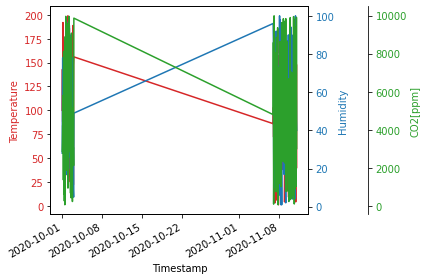

In [14]:
fig, ax1 = plt.subplots()
fig.autofmt_xdate()

color = 'tab:red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Temperature', color=color)
ax1.plot(df.index, df["Temperature"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Humidity', color=color)  # we already handled the x-label with ax1
ax2.plot(df.index, df["Humidity"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()  # instantiate a third axes that shares the same x-axis

color = 'tab:green'
# move to right
ax3.spines['right'].set_position(('outward', 60)) 
ax3.set_ylabel('CO2[ppm]', color=color)  # we already handled the x-label with ax1
ax3.plot(df.index, df["CO2[ppm]"], color=color)
ax3.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
